In [1]:
# PyThorch - To create the neural network
# matplotlib & seaborn to drow graphs

In [37]:
import torch # Used to crate tensor to storer all of the numerical values including the raw data
import torch.nn as nn # Used to make the weights and bias tensor part of the neural network
import torch.nn.functional as F # this gives us the activation functions
from torch.optim import SGD # stochastic gradient descent to fit the neural network to the data

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns # (sns Samual Norman SEABORN)

In [39]:
# create our NN class to herdar da nn.Module

class BasicNN(nn.Module):
    def __init__(self): # initialization methods for the class
        super().__init__() # call the initialization methods for the parent nn.Module class

         # Initialize the weights and biases in our neural network
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        input_to_top_relu = input*self.w00+self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01

        input_to_bottom_relu = input*self.w10+self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_botton_relu_output = bottom_relu_output*self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_botton_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [40]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [41]:
model = BasicNN()

In [42]:
output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0.5, 0, 'Dose')

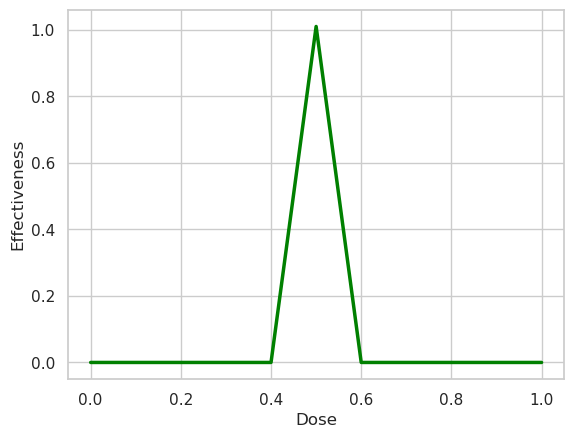

In [43]:
# ploting the graph
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y=output_values,
             color='green',
             linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

In [44]:
#Bora Treinar a rede
# create our NN class to herdar da nn.Module

class BasicNN_train(nn.Module):
    def __init__(self): # initialization methods for the class
        super().__init__() # call the initialization methods for the parent nn.Module class

         # Initialize the weights and biases in our neural network
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        # requires_grad=True indica à lib que esse parametro precisa ser otimizado
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True) 

    def forward(self, input):
        input_to_top_relu = input*self.w00+self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01

        input_to_bottom_relu = input*self.w10+self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_botton_relu_output = bottom_relu_output*self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_botton_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [45]:
model = BasicNN_train()

In [46]:
output_values = model(input_doses)
output_values

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)

Text(0.5, 0, 'Dose')

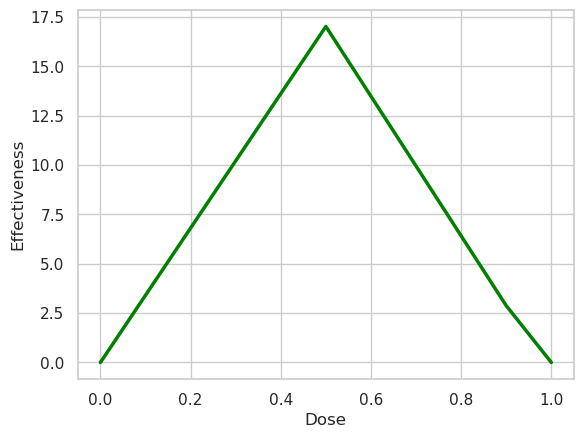

In [47]:
# Ploting the graph
sns.set(style = "whitegrid")
sns.lineplot(x = input_doses,
             y = output_values.detach(), # tirar o valor dos pesos treinos do tensor
             color = 'green',
             linewidth = 2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

In [48]:
## treinar a rede toda
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1.0, 0.])

optimizer = SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent to optmize b_final

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        output_i = model(input_i)

        loss = (output_i - label_i)**2
        loss.backward()
        total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
        
    optimizer.step()
    optimizer.zero_grad()
    
    print("Step:" + str(epoch) + " total_loss: " + str(total_loss) + " - Final bias: " + str(model.final_bias.data) + "\n")

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

Final bias, before optimization: tensor(0.)

Step:0 total_loss: 256.3200988769531 - Final bias: tensor(-3.2020)

Step:1 total_loss: 164.0448760986328 - Final bias: tensor(-5.7636)

Step:2 total_loss: 104.98870849609375 - Final bias: tensor(-7.8129)

Step:3 total_loss: 67.1927719116211 - Final bias: tensor(-9.4523)

Step:4 total_loss: 43.00336837768555 - Final bias: tensor(-10.7638)

Step:5 total_loss: 27.522159576416016 - Final bias: tensor(-11.8131)

Step:6 total_loss: 17.614181518554688 - Final bias: tensor(-12.6525)

Step:7 total_loss: 11.273076057434082 - Final bias: tensor(-13.3240)

Step:8 total_loss: 7.21476936340332 - Final bias: tensor(-13.8612)

Step:9 total_loss: 4.6174516677856445 - Final bias: tensor(-14.2909)

Step:10 total_loss: 2.9551703929901123 - Final bias: tensor(-14.6348)

Step:11 total_loss: 1.8913096189498901 - Final bias: tensor(-14.9098)

Step:12 total_loss: 1.210437297821045 - Final bias: tensor(-15.1298)

Step:13 total_loss: 0.7746805548667908 - Final bias: t

In [ ]:
## Each ti e our optimization code sees all of the training data is called an epoch

Text(0.5, 0, 'Dose')

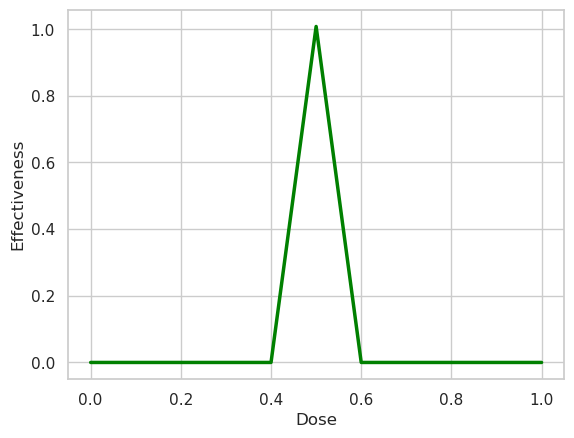

In [49]:
output_values = model(input_doses)
# Ploting the graph
sns.set(style = "whitegrid")
sns.lineplot(x = input_doses,
             y = output_values.detach(), # tirar o valor dos pesos treinos do tensor
             color = 'green',
             linewidth = 2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')